# Import Modules

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import Predicted Strains

In [4]:
# read in predicted strains from sesame
strains = pd.read_csv('../data/input/predicted_strains.csv')

# this csv was formatted badly by sesame, so we will have to do some data wrangling to get it into a shape we can use
# when the strain prediction function is run in R, it outputs a list of lists
# for each sample, it gives the predicted strain (.best), the p-value for that prediction (.pval)
# and a list of probabilities that the sample comes from one of the other ~35 strains in the database

strains.head()

,Unnamed: 0,X204375590004_R01C01.best,X204375590004_R01C01.pval,X204375590004_R01C01.probs,X204375590004_R01C02.best,X204375590004_R01C02.pval,X204375590004_R01C02.probs,X204375590004_R02C01.best,X204375590004_R02C01.pval,X204375590004_R02C01.probs,...,X204450040046_R05C01.probs,X204450040046_R05C02.best,X204450040046_R05C02.pval,X204450040046_R05C02.probs,X204450040046_R06C01.best,X204450040046_R06C01.pval,X204450040046_R06C01.probs,X204450040046_R06C02.best,X204450040046_R06C02.pval,X204450040046_R06C02.probs
0,1,LEWES_EiJ,0.844004,0.016591,LEWES_EiJ,0.84101,0.016582,LEWES_EiJ,0.840394,0.016383,...,0.016282,LEWES_EiJ,0.840629,0.016202,LEWES_EiJ,0.840663,0.016379,LEWES_EiJ,0.84018,0.016342
1,2,LEWES_EiJ,0.844004,0.032682,LEWES_EiJ,0.84101,0.032326,LEWES_EiJ,0.840394,0.031800,...,0.032747,LEWES_EiJ,0.840629,0.032318,LEWES_EiJ,0.840663,0.033520,LEWES_EiJ,0.84018,0.032496
2,3,LEWES_EiJ,0.844004,0.016591,LEWES_EiJ,0.84101,0.016582,LEWES_EiJ,0.840394,0.016383,...,0.016282,LEWES_EiJ,0.840629,0.016202,LEWES_EiJ,0.840663,0.016379,LEWES_EiJ,0.84018,0.016342
3,4,LEWES_EiJ,0.844004,0.034923,LEWES_EiJ,0.84101,0.034927,LEWES_EiJ,0.840394,0.034663,...,0.034061,LEWES_EiJ,0.840629,0.034507,LEWES_EiJ,0.840663,0.034257,LEWES_EiJ,0.84018,0.034756
4,5,LEWES_EiJ,0.844004,0.017451,LEWES_EiJ,0.84101,0.017106,LEWES_EiJ,0.840394,0.017145,...,0.017713,LEWES_EiJ,0.840629,0.016828,LEWES_EiJ,0.840663,0.017603,LEWES_EiJ,0.84018,0.017134


In [5]:
# note how the .best and .pval columns are just repeating values for each sample 
# and .probs is the only column that has different values
# we will transpose the df before working with it further

strains_transposed = strains.T 
strains_transposed.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
Unnamed: 0,1,2,3,4,5,6,7,8,9,10,...,27,28,29,30,31,32,33,34,35,36
X204375590004_R01C01.best,LEWES_EiJ,LEWES_EiJ,LEWES_EiJ,LEWES_EiJ,LEWES_EiJ,LEWES_EiJ,LEWES_EiJ,LEWES_EiJ,LEWES_EiJ,LEWES_EiJ,...,LEWES_EiJ,LEWES_EiJ,LEWES_EiJ,LEWES_EiJ,LEWES_EiJ,LEWES_EiJ,LEWES_EiJ,LEWES_EiJ,LEWES_EiJ,LEWES_EiJ
X204375590004_R01C01.pval,0.844004,0.844004,0.844004,0.844004,0.844004,0.844004,0.844004,0.844004,0.844004,0.844004,...,0.844004,0.844004,0.844004,0.844004,0.844004,0.844004,0.844004,0.844004,0.844004,0.844004
X204375590004_R01C01.probs,0.016591,0.032682,0.016591,0.034923,0.017451,0.016591,0.007894,0.033109,0.017499,0.153958,...,0.035087,0.016591,0.007845,0.034594,0.035334,0.016591,0.016591,0.033629,0.016591,0.003755
X204375590004_R01C02.best,LEWES_EiJ,LEWES_EiJ,LEWES_EiJ,LEWES_EiJ,LEWES_EiJ,LEWES_EiJ,LEWES_EiJ,LEWES_EiJ,LEWES_EiJ,LEWES_EiJ,...,LEWES_EiJ,LEWES_EiJ,LEWES_EiJ,LEWES_EiJ,LEWES_EiJ,LEWES_EiJ,LEWES_EiJ,LEWES_EiJ,LEWES_EiJ,LEWES_EiJ


In [6]:
# drop first row that was the index before df was transposed
strains_transposed = strains_transposed.iloc[1:,]

# now we will drop the ".probs" rows
# select rows that contain ".probs"
matching = [s for s in strains_transposed.index if ".probs" in s]

# drop those rows
strains_transposed = strains_transposed.drop(matching)

# drop duplicate columns
strains_transposed = strains_transposed.T.drop_duplicates().T
strains_transposed

,0
X204375590004_R01C01.best,LEWES_EiJ
X204375590004_R01C01.pval,0.844004
X204375590004_R01C02.best,LEWES_EiJ
X204375590004_R01C02.pval,0.84101
X204375590004_R02C01.best,LEWES_EiJ
...,...
X204450040046_R05C02.pval,0.840629
X204450040046_R06C01.best,LEWES_EiJ
X204450040046_R06C01.pval,0.840663
X204450040046_R06C02.best,LEWES_EiJ


In [7]:
# now we have a df of the best predicted strain and the pvalue for that prediction

# we can select rows from the df to get at either the strains or pvalues
strain = [s for s in strains_transposed.index if ".best" in s]
pval = [s for s in strains_transposed.index if ".pval" in s]


In [8]:
# best predicted strain for each sample
strains_transposed.loc[strain].head()

,0
X204375590004_R01C01.best,LEWES_EiJ
X204375590004_R01C02.best,LEWES_EiJ
X204375590004_R02C01.best,LEWES_EiJ
X204375590004_R02C02.best,LEWES_EiJ
X204375590004_R03C01.best,LEWES_EiJ


In [9]:
# it appears that the most common predicted strain is LEWES_EiJ
# LEWES_EiJ is an inbred, wild-derived strain and these mice have a pure M. m. domesticus genome.
strains_transposed.loc[strain].value_counts()

LEWES_EiJ    149
A_J           11
dtype: int64

Text(0, 0.5, 'P-Value')

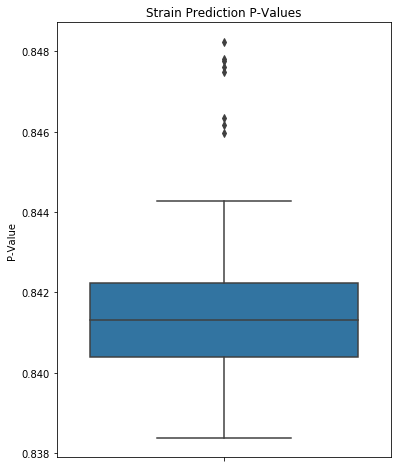

In [11]:
# however, from this boxplot, we can see that the p-values for these predictions are all over 0.05
# so sesame is not assigning statistical significance to any of the predictions

plt.figure(figsize=(6,8))
sns.boxplot(data=strains_transposed.loc[pval], y=0)
plt.title('Strain Prediction P-Values')
plt.ylabel('P-Value')
